In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats
from scipy.stats import iqr
import math as mathd
from scipy.special import comb
from numpy.random import choice
import seaborn as sns 
from decimal import Decimal

In [3]:
file=pd.read_csv('AMI_GSE.csv',skiprows = 59,header=None)
file.describe()

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
count,54677,54676.000000,54676.000000,54677.000000,54676.000000,54676.000000,54677.000000,54676.000000,54677.000000,54676.000000,...,54676.000000,54677.000000,54677.000000,54677.00000,54675.000000,54677.000000,54677.000000,54677.000000,54677.000000,54676.000000
unique,54677,50933.000000,50706.000000,51345.000000,51233.000000,51233.000000,51128.000000,50990.000000,50782.000000,51011.000000,...,51130.000000,51654.000000,50139.000000,50722.00000,50166.000000,49899.000000,50312.000000,50856.000000,51208.000000,50715.000000
top,1557523_at,3.341133,5.197204,3.975526,4.414494,4.338422,3.901468,5.158044,3.794131,3.344018,...,4.365642,4.169199,5.427796,4.97055,5.818814,5.522381,5.306377,3.616558,2.768358,4.178491
freq,1,43.000000,39.000000,33.000000,34.000000,37.000000,42.000000,36.000000,40.000000,45.000000,...,48.000000,25.000000,51.000000,56.00000,54.000000,77.000000,47.000000,75.000000,37.000000,72.000000


# A - High level description of the data and some pre-rocessing 

#  A : 1-4

1) 54,675 genes profiled

2) 99 subjects in total

3) 49 labled M , 50 labled H

4) we have 54,628 rows left 

In [132]:
genes=file.dropna()

genes.describe()

num_of_genes=54629


# A.5.

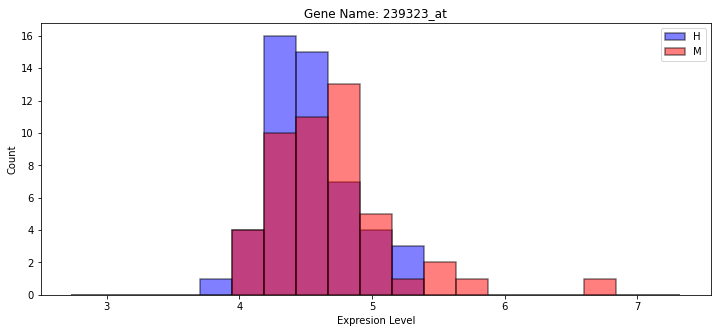

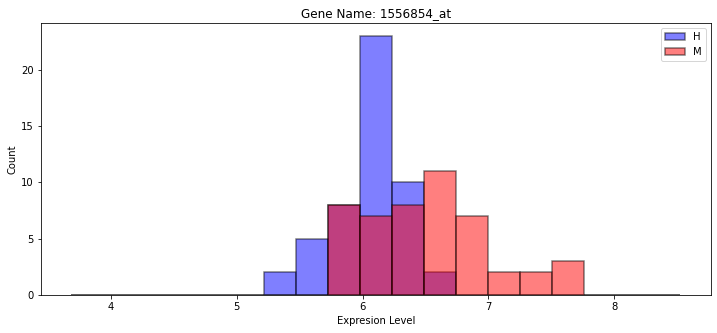

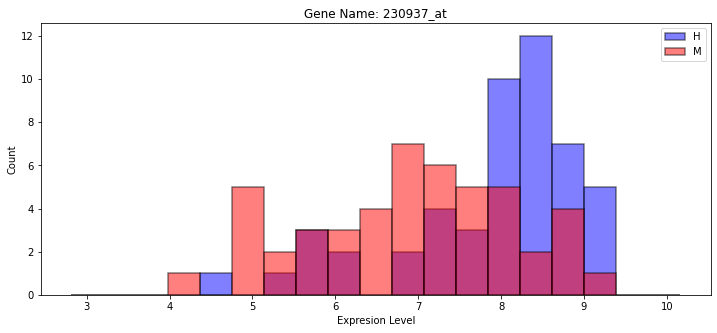

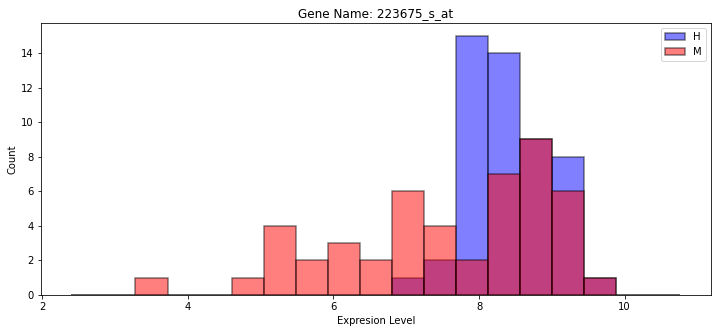

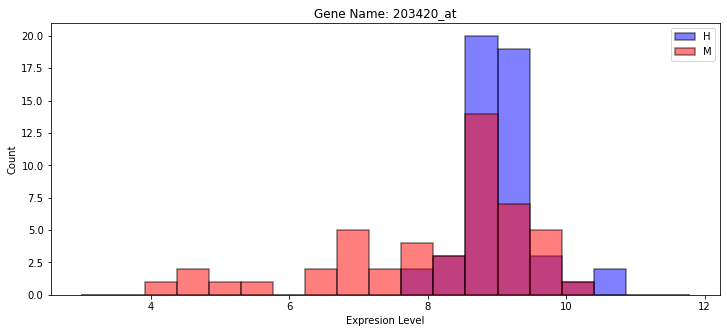

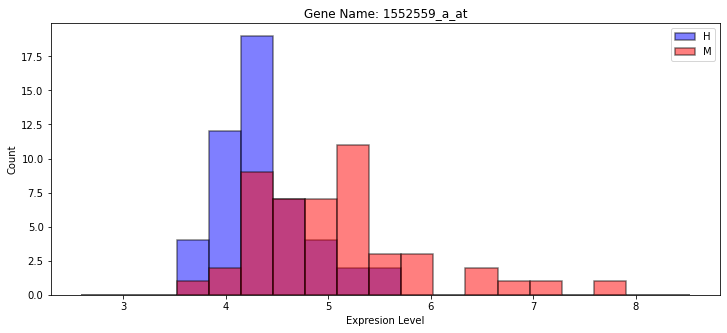

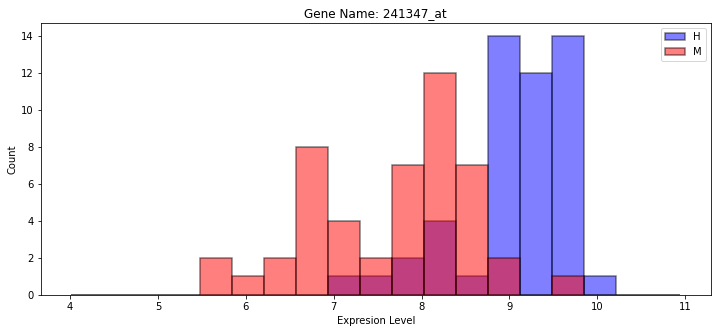

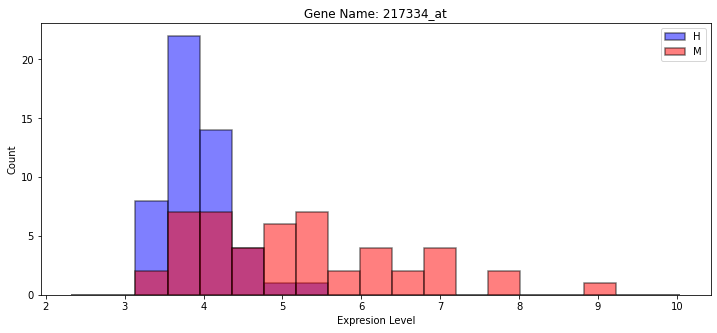

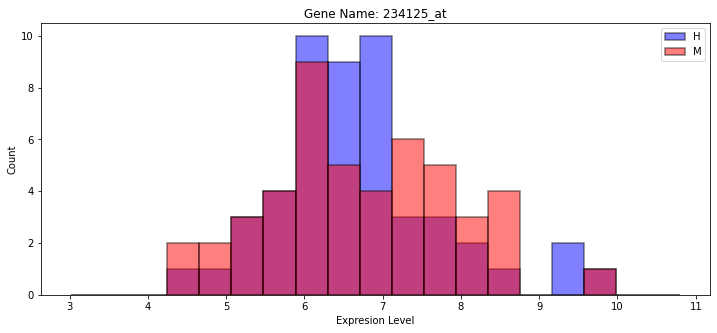

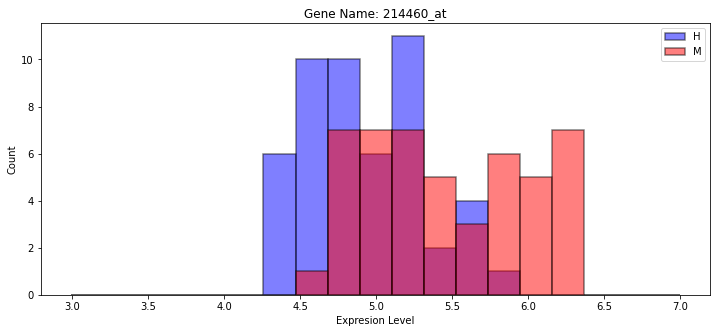

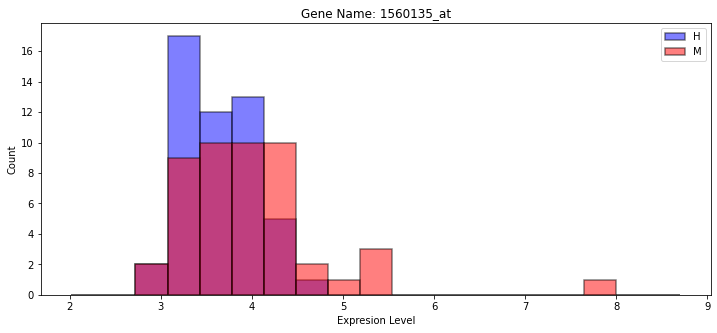

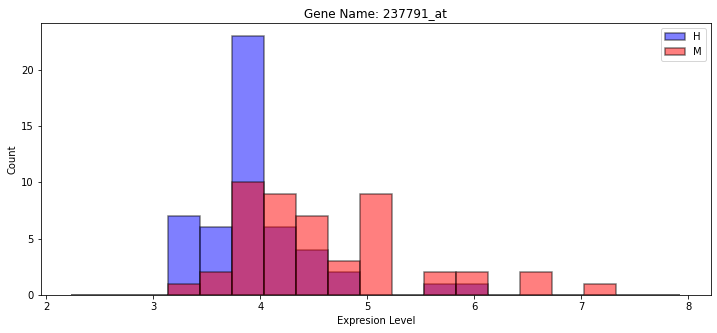

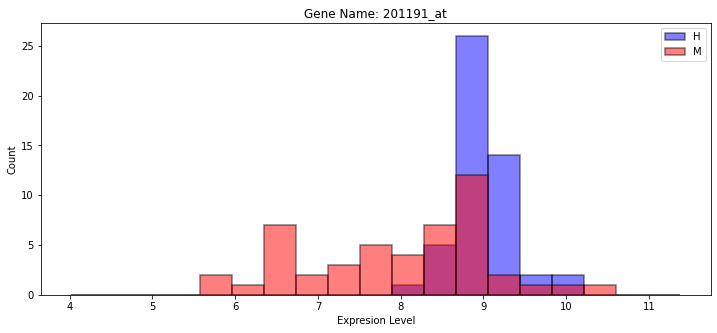

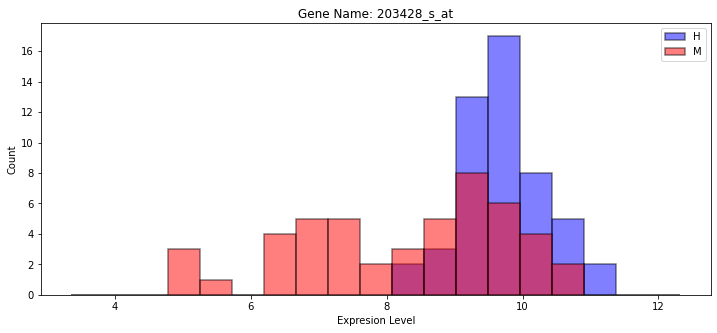

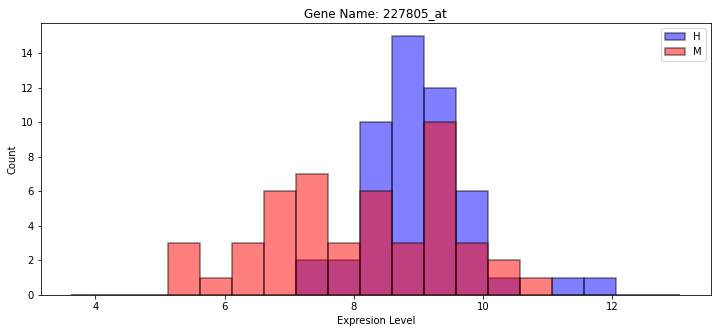

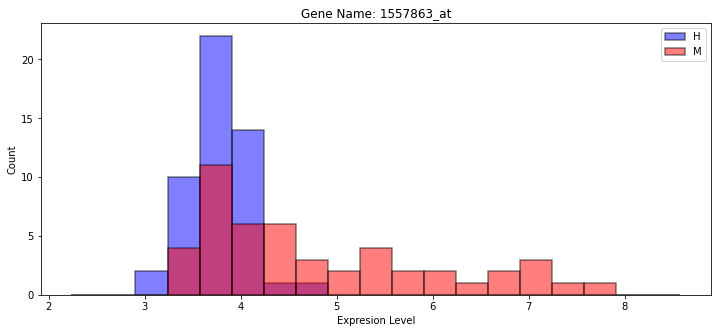

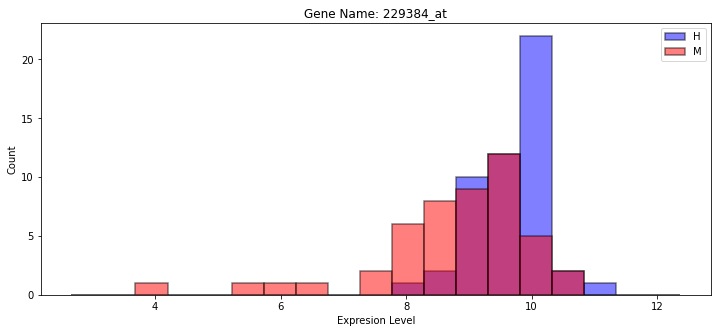

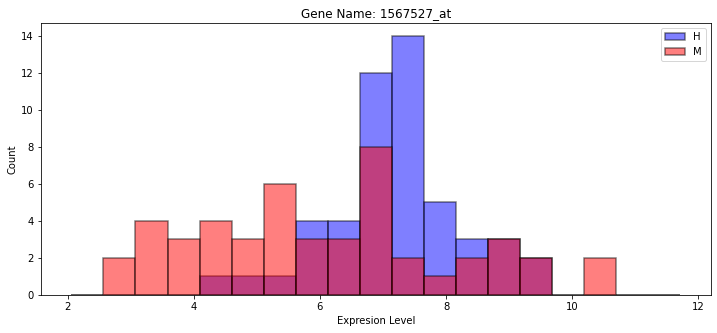

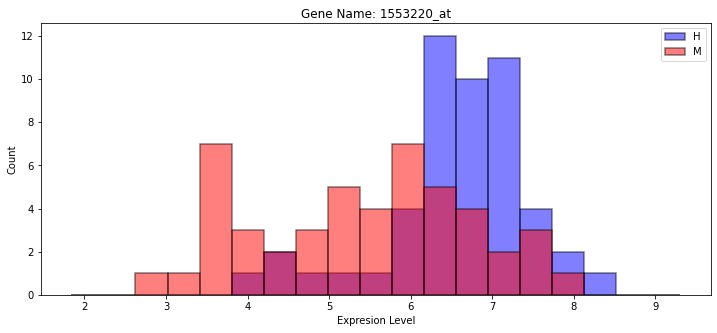

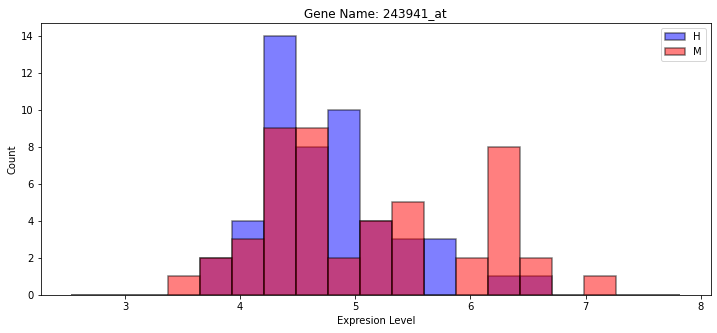

In [133]:
def plot_rand_genes_sample(gene_index):
    gene_name=genes.iloc[gene_index][0]
    data=genes.iloc[gene_index][1:].to_numpy(dtype=np.float)

    
    data_H=data[1:51]
    data_M=data[51:]
    fig = plt.figure(figsize=(12, 5))
    plt.title(f"Gene Name: {gene_name}")
    plt.xlabel("Expresion Level")
    plt.ylabel('Count')
    bins = np.linspace(0.7*data.min(), 1.1*data.max(), 20)
    plt.hist(data_H, bins=bins, color="blue", edgecolor='black', linewidth=1.5, alpha=0.5, label="H")
    plt.hist(data_M, bins=bins, color="red", edgecolor='black', linewidth=1.5, alpha=0.5, label="M")
    plt.legend()
    plt.show()
    
    
hist=genes.sample(n=20)
genes_rand_index=hist.index

for i in genes_rand_index:
    plot_rand_genes_sample(i)

# B - WRS for differential expression

In [134]:
### Part (B) - settings ###
rs_g = (49*(99+1))/2
c=0
for i in range (51,100):
    c+=i
mu_m = np.sqrt((49*(99-49)*(99+1))/12)

#  B.1.

Under the NULL model, the expected sum of ranks for samples labeled M is:

In [135]:
print(f'The expected sum of ranks of class M is: {rs_g}')

The expected sum of ranks of class M is: 2450.0


# B.2. 



In [136]:
print(f'The maximal value rs_g can get will be if all M class are at the end, which means: {c}')

The maximal value rs_g can get will be if all M class are at the end, which means: 3675


# B.3.

<b>Explanation:</b><br>
Under the NULL model, the samples are randomly drown from the same distribution.<br> 
Therefore, there are (N choose k) permutations over all.<br> 
There is only one permutation of the above that saticfied <b>c</b>, therefore the probability to get <b>c</b> is: $ \frac{1}{\binom{99}{49}} $ <br> 
As required

In [137]:

print(f'The probability of getting c as sum of tank is aproximatly: {1/(comb(99, 49))}')

The probability of getting c as sum of tank is aproximatly: 1.982330604283668e-29


# B.4.

<b>Explanation:</b><br>
I case of **c-1** as well we have only one permutation possible out of all permutations given,<br>
Therefore it is the same as **B3**

Regarding **c-2** - there are 2 possible permutations out of all:
<ol>
<li>Take the k-1 biggest rank elements and add the element in position k+2 (starts from last to least)</li>
<li>Take the biggest rank element in the link, and then take the k-1 elements from k-2 untill you'll have k elements (including the biggest) </li>
</ol>
Therefore, the probability to get **c-2** out of all permutation is: $ \frac{2}{\binom{99}{49}} $ <br> 
As required

In [138]:
print(f'The probability of getting c_1 as sum of tank is aproximatly: {1/(comb(99, 49))}')
print(f'The probability of getting c_2 as sum of tank is aproximatly: {2/(comb(99, 49))}')

The probability of getting c_1 as sum of tank is aproximatly: 1.982330604283668e-29
The probability of getting c_2 as sum of tank is aproximatly: 3.964661208567336e-29


In [139]:


# drop 1st line (ids)
file = file.iloc[1:]
file.head()

,Class,H,H.1,H.2,H.3,H.4,H.5,H.6,H.7,H.8,...,M.39,M.40,M.41,M.42,M.43,M.44,M.45,M.46,M.47,M.48
1,1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
2,1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
3,117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
4,121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966
5,1255_g_at,2.792047952,2.69571445,2.580181122,2.712123845,2.723686912,2.70668403,2.674746672,2.635149735,2.696649177,...,2.924657514,2.714103313,3.635944854,2.710943641,2.979380765,3.73013912,2.914867562,3.013901455,2.729319786,3.151449425


In [140]:
# sort column by H or M 
file = file.reindex(sorted(file.columns), axis=1)
file.head()


,Class,H,H.1,H.10,H.11,H.12,H.13,H.14,H.15,H.16,...,M.44,M.45,M.46,M.47,M.48,M.5,M.6,M.7,M.8,M.9
1,1007_s_at,5.866377893,4.948736331,5.984604923,6.444126136,4.919960058,6.837306739,5.226222617,6.137944876,6.444286484,...,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944,5.249898632,5.5115008,4.949107666,5.15158282,5.126908181
2,1053_at,8.22579012,7.525865369,7.552293801,8.158129288,7.799660696,8.024727782,6.805195785,7.695904083,7.808027698,...,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352,8.708723479,8.087233588,7.87213707,8.146643771,7.904486787
3,117_at,6.17973231,6.628137025,5.899590353,5.753603452,5.88034165,6.312273204,6.733494503,6.136813754,7.929139871,...,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813,9.468659375,7.496835018,6.577697593,7.188135534,6.005948079
4,121_at,6.179477974,6.58288903,6.390802972,6.516452986,5.791862352,5.94397632,6.003585491,5.874295915,6.041638047,...,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966,6.427513441,6.191955953,6.212988531,6.49887736,6.621110154
5,1255_g_at,2.792047952,2.69571445,2.812739636,3.037491344,2.7961602,2.767586455,2.895933817,2.884100788,2.706393773,...,3.73013912,2.914867562,3.013901455,2.729319786,3.151449425,2.679046235,2.618107798,2.75579677,2.719151057,2.587878147


# B.5.

In [141]:
def ranks_sum(index):

    
    df=pd.DataFrame(data=file.iloc[index][1:].to_numpy(dtype=np.float), columns=['data'])
    df['lable']= np.copy(file.columns[1:])

#     sorting from smallest to largest
    df['sorted_ranks']=np.argsort(df['data'])
    df=df.sort_values(['sorted_ranks'])
    df['binar']=0
    

    binar_lables=[]
    length=df['data'].shape[0]

    for i in range(length):
        string=df['lable'].iloc[i]
#        if lables M - 1, is lable H -0
        if string.find('M')==0:
            binar_lables.append(1)
        else:
            binar_lables.append(0)

    df['binar_lbl']=binar_lables
    df['ranks']=df['binar_lbl']*df['sorted_ranks']

    ranks_sum=np.sum(df['ranks'])
    return ranks_sum


ranks=[]



for i in range(num_of_genes):
    rs=ranks_sum(i)
    
    ranks.append(rs)


Genes ranks sum iqr :390.0


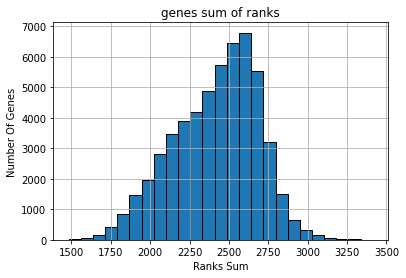

In [142]:
plt.hist(ranks,bins=25,edgecolor='black')
plt.grid()
plt.title('genes sum of ranks')
plt.xlabel("Ranks Sum")
plt.ylabel('Number Of Genes')


print (f'Genes ranks sum iqr :{ iqr(ranks)}')

# C-differential Expression

In [143]:

selected_columns = file['Class']
M_vs_H =pd.DataFrame(columns=['Class','WRS','TTEST'])
M_vs_H['Class']=selected_columns.copy()

num_of_rows=(len(file.index))


for i in range(num_of_rows):

    data=file.iloc[i]
    
    H=data[1:51].to_numpy(dtype=np.float)
    M=data[51:100].to_numpy(dtype=np.float)
    ttest=stats.ttest_ind(H,M,equal_var=True)

    
    rs=stats.ranksums(H,M)

    if ttest[0]>0:
        ttest_pval=1-(ttest[1]/2)
    else:
        ttest_pval=(ttest[1]/2)
    if rs[0]>0:
        rs_pval=1-(rs[1]/2)
    else:
        rs_pval=(rs[1]/2)

    M_vs_H.iloc[i]['WRS']=rs_pval
    M_vs_H.iloc[i]['TTEST']=ttest_pval
    
# print(M_vs_H)


In [144]:
# over expressed genes p-val <=0.07

# t-test
over_ex_ttest=np.count_nonzero(M_vs_H['TTEST']<=0.07)
over_ex_wrs=np.count_nonzero(M_vs_H['WRS']<=0.07)
over_ex_both=np.count_nonzero(np.where((M_vs_H['TTEST']<=0.07) &( M_vs_H['WRS']<=0.07 )))
over_ex_wrs_data=M_vs_H[M_vs_H['WRS']<=0.07]
over_ex_ttest_data=M_vs_H[M_vs_H['TTEST']<=0.07]
print(f'number of T-test overexpressed genes is {over_ex_ttest}')
print(f'number of WRS overexpressed genes is {over_ex_wrs}')
print(f'number of  overexpressed genes both in T-test and WRS is {over_ex_both}')

number of T-test overexpressed genes is 8517
number of WRS overexpressed genes is 10798
number of  overexpressed genes both in T-test and WRS is 7593


In [145]:
# under expressed genes p-val >=1-0.07=0.93

# t-test
under_ex_ttest=np.count_nonzero(M_vs_H['TTEST']>=0.93)
under_ex_wrs=np.count_nonzero(M_vs_H['WRS']>=0.93)
under_ex_both=np.count_nonzero(np.where((M_vs_H['TTEST']>=0.93) &( M_vs_H['WRS']>=0.93 )))


under_ex_wrs_data=M_vs_H[M_vs_H['WRS']>=0.93]
print(f'number of T-test underexpressed genes is {under_ex_ttest}')
print(f'number of WRS underexpressed genes is {under_ex_wrs}')
print(f'number of  underexpressed genes both in T-test and WRS is {under_ex_both}')

number of T-test underexpressed genes is 8639
number of WRS underexpressed genes is 10675
number of  underexpressed genes both in T-test and WRS is 8089


# D- correlations 

# D.1. correlation matrix 

In [146]:
# D-1

# choosing 80 most significant genes from WRS (80 underexpressed and 80 overexpressed)
# overexpressed
D_over=M_vs_H.sort_values('WRS', ascending=True).head(80)
# underexpressed
D_under=M_vs_H.sort_values('WRS', ascending=False).head(80)



<AxesSubplot:>

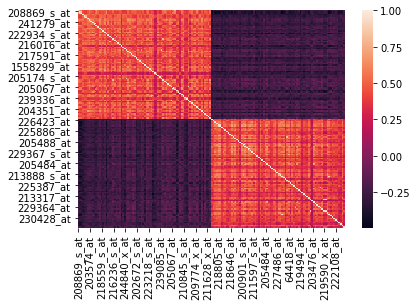

In [147]:

D=pd.concat([D_over,D_under], axis=0)

D=pd.merge(D, file, how='inner')
D=D.drop(['WRS', 'TTEST'], axis=1)

lables=D['Class'].to_numpy(dtype=np.str)

len_d=len(D)
res_mat_D_p_val=np.zeros((len_d,len_d))
D
res_mat_D=np.zeros((len_d,len_d))
for i in range(len_d):
    for j in range(len_d):
        D_i=D.iloc[i]
        D_j=D.iloc[j]
        a=D_i[1:100].to_numpy(dtype=np.float)
        b=D_j[1:100].to_numpy(dtype=np.float)
        value=stats.kendalltau(a,b)
        res_mat_D[i][j]=value[0]
        res_mat_D_p_val[i][j]=value[1]
# print(res_mat_D)

# creating dataframe with data and lables 
df_mat_D=pd.DataFrame(data=res_mat_D,index=lables,columns=lables)
df_mat_D_pval=pd.DataFrame(data=res_mat_D_p_val,index=lables,columns=lables)
sns.heatmap(df_mat_D)


# D.2.

In [148]:

# we expect tau to be equeal to 0 - because under the null model we assuming that genes are pairwise independent 


mean=df_mat_D.mean(axis=0)
mean=np.mean(mean)
print(f'the observed mean is {mean}')


the observed mean is 0.09016181231892703


In [149]:
test_con=df_mat_D

s=df_mat_D.unstack()
sorting_asc=s.sort_values(kind="quicksort")
sorting_desc=s.sort_values(kind="quicksort",ascending=False)
sorting_desc
df_test=pd.DataFrame(data=sorting_desc,columns=['corr'])

df_test=df_test.reset_index()
df_test
sp=df_mat_D_pval.unstack()

sorting_asc_p=sp.sort_values(kind="quicksort")
sorting_desc_p=sp.sort_values(kind="quicksort",ascending=False)
# sorting_desc
df_test_p=pd.DataFrame(data=sorting_desc_p,columns=['pval'])
df_test_p=df_test_p.reset_index()

join_df_test=pd.merge(df_test,df_test_p, how='left', left_on=['level_0','level_1'],right_on=['level_0','level_1'])

# join_df_test


In [150]:

# over-expressed
arr_over=np.where((M_vs_H['TTEST']<=0.07) &( M_vs_H['WRS']<=0.07 ))
over_ex=M_vs_H.iloc[arr_over]

# under_expressed
arr_under=np.where((M_vs_H['TTEST']>=0.93) &( M_vs_H['WRS']>=0.93 ))
under_ex=M_vs_H.iloc[arr_under]





In [151]:


results_co_expresse=pd.DataFrame(columns=['gene_1','gene_2','corr','relation','pval'])

leng=join_df_test.shape[0]
print(leng)
for i in range(leng):
    if (join_df_test.iloc[i][0]!=join_df_test.iloc[i][1]) and join_df_test['corr'][i]>0:
#         if both different numbers and positive numbers
        if np.count_nonzero(over_ex['Class'].str.contains(join_df_test.iloc[i][0])) & np.count_nonzero(over_ex['Class'].str.contains(join_df_test.iloc[i][1])) :
#             both genes are over expressed together 
            results_co_expresse= results_co_expresse.append({'gene_1': join_df_test.iloc[i][0], "gene_2":join_df_test.iloc[i][1], "corr":join_df_test['corr'][i],'relation':"over", "pval":join_df_test['pval'][i]}, ignore_index=True)

#             under expression 
    if (join_df_test.iloc[i][0]!=join_df_test.iloc[i][1]) & (join_df_test['corr'][i]<=0):
#         if both different numbers and negative numbers
        if np.count_nonzero(under_ex['Class'].str.contains(join_df_test.iloc[i][0])) & np.count_nonzero(under_ex['Class'].str.contains(join_df_test.iloc[i][1])):
#             both genes are over expressed together 
            results_co_expresse= results_co_expresse.append({'gene_1': join_df_test.iloc[i][0], "gene_2":join_df_test.iloc[i][1], "corr":join_df_test['corr'][i],'relation':"under", "pval":join_df_test['pval'][i]}, ignore_index=True)
            
# results_co_expresse



25600


co-expression -the situation where two genes expressed both by being under-expression or over-expression both.
 
we can see that we have co-expression between low values on x-axis and low values on y-axis
same with higher values in both axis ( we can see the 2 orange squares)

in addition we can observed that we have significant co-expressed  from above table for values smaller than -0.3 and values higher than 0.8

# D.3. 


in the heatmap we can see a strong correlation between over expressed genes (in orange )  and strong (negative) correlation between under expressed genes.
we can see significant co-expression  in bright orange and in dark purple

# D.4.  FDR calculation

In [152]:
# remove duplication of genes 
def remove_duplications(df):
    df= df.sort_values(by=['pval','level_0','level_1'],ascending=False)
    df=df[::2]


    df= df.reset_index()
    df= df.drop(['index'],axis=1)
    return df



In [153]:


def calc_FDR(df):
    
    len_df=len(df)
    
    results=[]

    
    for i in range(len_df):
        #     rank
        rank=len_df-i

         
        calc=df['pval'].iloc[i]*len_df/rank

        if i>0:
            calc=min(calc,results[i-1])
            
        
        results.append(calc)
            

        
    return np.asarray(results)
    
join_df_test=remove_duplications(join_df_test)
fdr_calc=calc_FDR(join_df_test)

print(f' we have {np.count_nonzero(np.where(fdr_calc<=0.05 ))} co-expressed pairs of genes with FDR=0.05')

 we have 12433 co-expressed pairs of genes with FDR=0.05


# D.5.

Q- What would have been advantages and disadvantages of
computing co-expression for all genes in the study rather than
only for genes in D? 


A-

**advantages**

-we are using all data for calculation , so in this way we are not "losing" any piece of data.


**disadvantages**:

-the data that we woulh have dropped at the beggining will not give us any benefit .

-in our calculation we want to focuse our efforts in more significent genes ,if we will keep all genes we will not be able to focuse in more relevant genes .

-calculation complexity will be higher 

-less comfortable to look at messy data (it will be hard to understand where we should focus)

-higher potential to calculation mistakes and data misread 

# D.6.   repeating steps D.1-5 -samples labled M

<AxesSubplot:>

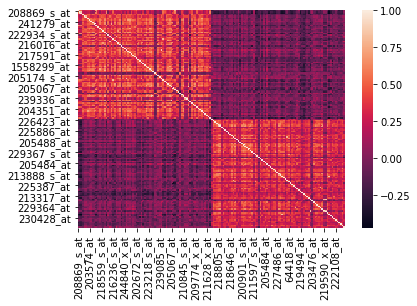

In [154]:
# D.1.

# create new DF with 160 genes labled M -chosen above 

D=pd.concat([D_over,D_under], axis=0)

D=pd.merge(D, file, how='inner')

D=D.drop(['WRS', 'TTEST'], axis=1)
D_M_lables_only =D.drop(   D.columns[1:51],axis=1)


lables_M=D_M_lables_only['Class'].to_numpy(dtype=np.str)
# print(D_M_lables_only['Class'].to_numpy(dtype=np.str))
len_d_m=len(D_M_lables_only)
genes_id_high_expression=[]
res_mat_D_M_p_val=np.zeros((len_d_m,len_d_m))
# print(D_M_lables_only.iloc[0][1:50].to_numpy(dtype=np.float))
res_mat_D_M=np.zeros((len_d_m,len_d_m))
for i in range(len_d_m):
    for j in range(len_d_m):
        D_m_i=D_M_lables_only.iloc[i]
        D_m_j=D_M_lables_only.iloc[j]
#         print(D_m_i)
        a=D_m_i[1:50].to_numpy(dtype=np.float)
        b=D_m_j[1:50].to_numpy(dtype=np.float)
        value=stats.kendalltau(a,b)
        res_mat_D_M[i][j]=value[0]
        res_mat_D_M_p_val[i][j]=value[1]
        if value[0]<1 and value[0]>0.5:
            genes_id_high_expression.append(lables_M[i])
            
#             print(genes_id_high_expression)
# print(res_mat_D_M)

# creating dataframe with data and lables 
df_mat_D_M=pd.DataFrame(data=res_mat_D_M,index=lables_M,columns=lables_M)
df_mat_D_M_pval=pd.DataFrame(data=res_mat_D_M_p_val,index=lables_M,columns=lables_M)

sns.heatmap(df_mat_D_M)


In [155]:
# D-2

# observed mean -d2
mean_m=df_mat_D_M.mean(axis=0)
mean_m=np.mean(mean_m)
print(f'the observed mean for sampled labled M is {mean_m}')

the observed mean for sampled labled M is 0.1414766908372432


In [156]:
# D-3

test_con_m=df_mat_D_M

s=df_mat_D_M.unstack()
sorting_asc_m=s.sort_values(kind="quicksort")
sorting_desc_m=s.sort_values(kind="quicksort",ascending=False)

df_test_m=pd.DataFrame(data=sorting_desc_m,columns=['corr'])

df_test_m=df_test_m.reset_index()
df_test_m
# print(df_test_m.shape)

spm=df_mat_D_M_pval.unstack()
# print()
sorting_asc_p_m=spm.sort_values(kind="quicksort")
sorting_desc_p_m=spm.sort_values(kind="quicksort",ascending=False)
# sorting_desc
df_test_p_m=pd.DataFrame(data=sorting_desc_p_m,columns=['pval'])
df_test_p_m=df_test_p_m.reset_index()
# print(np.where(df_test_p['level_1']== '224879_at'))
# print(np.where(df_test_p['level_0']== '224879_at'))
# print(df_test_p.iloc[25458])
# df_test_p
join_df_test_m=pd.merge(df_test_m,df_test_p_m, how='left', left_on=['level_0','level_1'],right_on=['level_0','level_1'])
# df_test.join(df_test_p,how='inner',on=['level_0','level_1'])
# join_df_test_m

In [157]:
# over-expressed
arr_over_m=np.where((join_df_test_m['pval']<=0.07)  )
over_ex_m=join_df_test_m.iloc[arr_over_m]

# under_expressed
arr_under_m=np.where((join_df_test_m['pval']>=0.93) )
under_ex_m=join_df_test_m.iloc[arr_under_m]

In [158]:
print(f'number of over expressed genes for samples labled M {over_ex_m.shape[0]}')
print(f'number of under expressed genes for samples labled M  {under_ex_m.shape[0]}')

number of over expressed genes for samples labled M 12272
number of under expressed genes for samples labled M  846


In [159]:
# D.4

join_df_test_m=remove_duplications(join_df_test_m)
fdr_calc_m=calc_FDR(join_df_test_m)

print(f' we have {np.count_nonzero(np.where(fdr_calc_m<=0.05 ))} co-expressed pairs of genes with FDR=0.05 and labled M')

 we have 5056 co-expressed pairs of genes with FDR=0.05 and labled M


# E Plots and conclusions

# E.1.

Text(0.5, 1.0, 'WRS overabundance plot- all genes ')

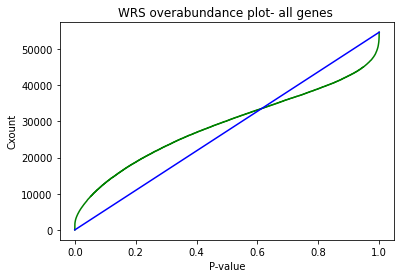

In [160]:

data_sort_test_w=M_vs_H['WRS'].sort_values( ascending=True)

data_sort_test_w=data_sort_test_w.reset_index()
data_sort_test_w= data_sort_test_w.drop(['index'],axis=1)

fig,ax=plt.subplots()
plot_df=pd.DataFrame()
plot_df['pval']=data_sort_test_w['WRS']
xy_x = np.linspace(0, max(plot_df['pval']), len(plot_df['pval']))
xy_y = xy_x * (max(plot_df.index) / max(plot_df['pval']))

plot_df.reset_index()

ax.plot(plot_df['pval'],plot_df.index,'g')
ax.plot(xy_x,xy_y,'b')
ax.set_xlabel('P-value')
ax.set_ylabel('Cxount')
ax.set_title('WRS overabundance plot- all genes ')


Text(0.5, 1.0, 'T-test overabundance plot- all genes ')

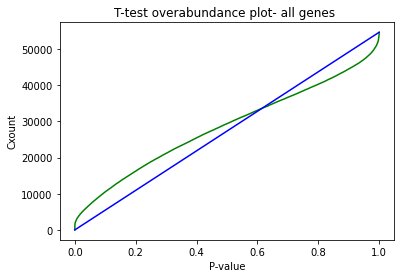

In [161]:
data_sort_test_t=M_vs_H['TTEST'].sort_values( ascending=True)
# data_sort_tes
data_sort_test_t=data_sort_test_t.reset_index()
data_sort_test_t= data_sort_test_t.drop(['index'],axis=1)
data_sort_test_t
fig,ax=plt.subplots()
plot_df=pd.DataFrame()
plot_df['pval']=data_sort_test_t['TTEST']
xy_x = np.linspace(0, max(plot_df['pval']), len(plot_df['pval']))
xy_y = xy_x * (max(plot_df.index) / max(plot_df['pval']))


plot_df.reset_index()

ax.plot(plot_df['pval'],plot_df.index,'g')
ax.plot(xy_x,xy_y,'b')
ax.set_xlabel('P-value')
ax.set_ylabel('Cxount')
ax.set_title('T-test overabundance plot- all genes ')

In [162]:
over_ex_wrs_data.head()

,Class,WRS,TTEST
3,117_at,8.92938e-06,5.32352e-05
8,1320_at,0.0458355,0.00900416
22,1552271_at,0.0371608,0.0950317
26,1552276_a_at,0.00934869,0.0147188
29,1552279_a_at,0.0419368,0.101036


Text(0.5, 1.0, 'WRS overabundance plot- over-expressed genes ')

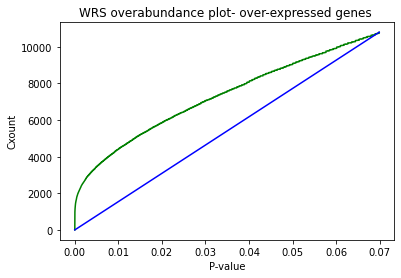

In [163]:
data_sort_test_o=over_ex_wrs_data['WRS'].sort_values( ascending=True)
data_sort_test_o

data_sort_test_o=data_sort_test_o.reset_index()
data_sort_test_o= data_sort_test_o.drop(['index'],axis=1)

fig,ax=plt.subplots()
plot_df=pd.DataFrame()
plot_df['pval']=data_sort_test_o['WRS']
xy_x = np.linspace(0, max(plot_df['pval']), len(plot_df['pval']))
xy_y = xy_x * (max(plot_df.index) / max(plot_df['pval']))
# print((max(plot_df['pval']),max(plot_df.index)))
plot_df.reset_index()
# print(plot_df)
# print(plot_df.index)
ax.plot(plot_df['pval'],plot_df.index,'g')
ax.plot(xy_x,xy_y,'b')
ax.set_xlabel('P-value')
ax.set_ylabel('Cxount')
ax.set_title('WRS overabundance plot- over-expressed genes ')

Text(0.5, 1.0, 'T-test overabundance plot- over-expressed genes ')

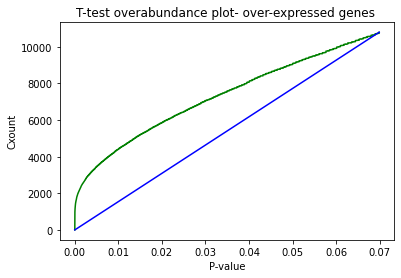

In [164]:
data_sort_test_u=over_ex_ttest_data['WRS'].sort_values( ascending=True)
data_sort_test_u

data_sort_test_u=data_sort_test_u.reset_index()
data_sort_test_u= data_sort_test_u.drop(['index'],axis=1)

fig,ax=plt.subplots()
plot_df=pd.DataFrame()
plot_df['pval']=data_sort_test_o['WRS']
xy_x = np.linspace(0, max(plot_df['pval']), len(plot_df['pval']))
xy_y = xy_x * (max(plot_df.index) / max(plot_df['pval']))
# print((max(plot_df['pval']),max(plot_df.index)))
plot_df.reset_index()
# print(plot_df)
# print(plot_df.index)
ax.plot(plot_df['pval'],plot_df.index,'g')
ax.plot(xy_x,xy_y,'b')
ax.set_xlabel('P-value')
ax.set_ylabel('Cxount')
ax.set_title('T-test overabundance plot- over-expressed genes ')

# 1-A FDR= 0.05

In [165]:


wrs_a=np.count_nonzero(data_sort_test_w['WRS']<=0.05)
ttest_a=np.count_nonzero(data_sort_test_t['TTEST']<=0.05)
print(f'WRS- number of genes that <= 0.05 FDR ={wrs_a}')
print(f'T-test- number of genes that <= 0.05 FDR ={ttest_a}')



WRS- number of genes that <= 0.05 FDR =9030
T-test- number of genes that <= 0.05 FDR =7067


# 1-B FDR= 0.01

In [166]:

wrs_b=np.count_nonzero(data_sort_test_w['WRS']<=0.01)
ttest_b=np.count_nonzero(data_sort_test_t['TTEST']<=0.01)
print(f'WRS- number of genes that <= 0.01 FDR ={wrs_b}')
print(f'T-test- number of genes that <= 0.01 FDR ={ttest_b}')

WRS- number of genes that <= 0.01 FDR =4404
T-test- number of genes that <= 0.01 FDR =3505


# 1-C FDR= 0.005

In [167]:

wrs_c=np.count_nonzero(data_sort_test_w['WRS']<=0.005)
ttest_c=np.count_nonzero(data_sort_test_t['TTEST']<=0.005)
print(f'WRS- number of genes that <= 0.005 FDR ={wrs_c}')
print(f'T-test- number of genes that <= 0.005 FDR ={ttest_c}')

WRS- number of genes that <= 0.005 FDR =3442
T-test- number of genes that <= 0.005 FDR =2758


# E.2.

In [168]:
# gene_name=
# a=genes[genes['Class']=='201473_at']
# # print(a)

# dd=a.index[0]
# # print(genes.iloc[dd][1:].to_numpy(dtype=np.float))
# print(genes['Class'].iloc[dd])
# print(gene_name[:][1:])
# gene_name[1:].to_numpy(dtype=np.float)

In [169]:
def plot_genes_hist(class_):
    gene_name=genes[genes['Class']==class_]
    idx=gene_name.index[0]
    gene_title=genes['Class'].iloc[idx]
#     print(gene_title)
    data=genes.iloc[idx][1:].to_numpy(dtype=np.float)

    
    data_H=data[1:51]
    data_M=data[51:]
    fig = plt.figure(figsize=(12, 5))
    plt.title(f"Gene Name: {gene_title}")
    plt.xlabel("Expresion Level")
    plt.ylabel('Count')
    bins = np.linspace(0.7*data.min(), 1.1*data.max(), 20)
    plt.hist(data_H, bins=bins, color="blue", edgecolor='black', linewidth=1.5, alpha=0.5, label="H")
    plt.hist(data_M, bins=bins, color="red", edgecolor='black', linewidth=1.5, alpha=0.5, label="M")
    plt.legend()
    plt.show()

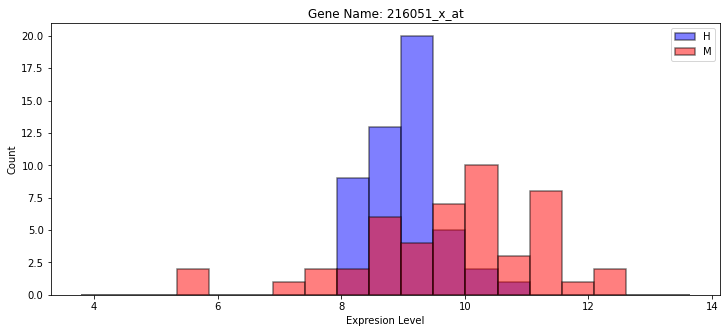

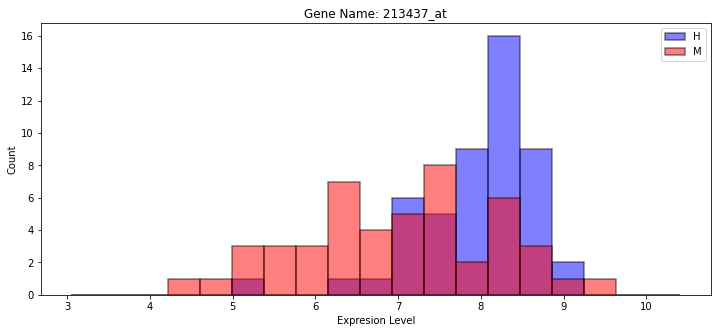

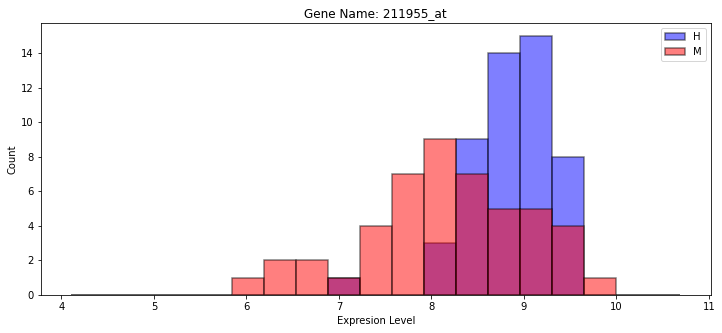

In [173]:
# choose 3 significant genes randonly from a list - from D

g1_class,g2_class,g3_class=choice(D['Class'],size=3)
plot_genes_hist(g1_class)
plot_genes_hist(g2_class)
plot_genes_hist(g3_class)



# E.3.

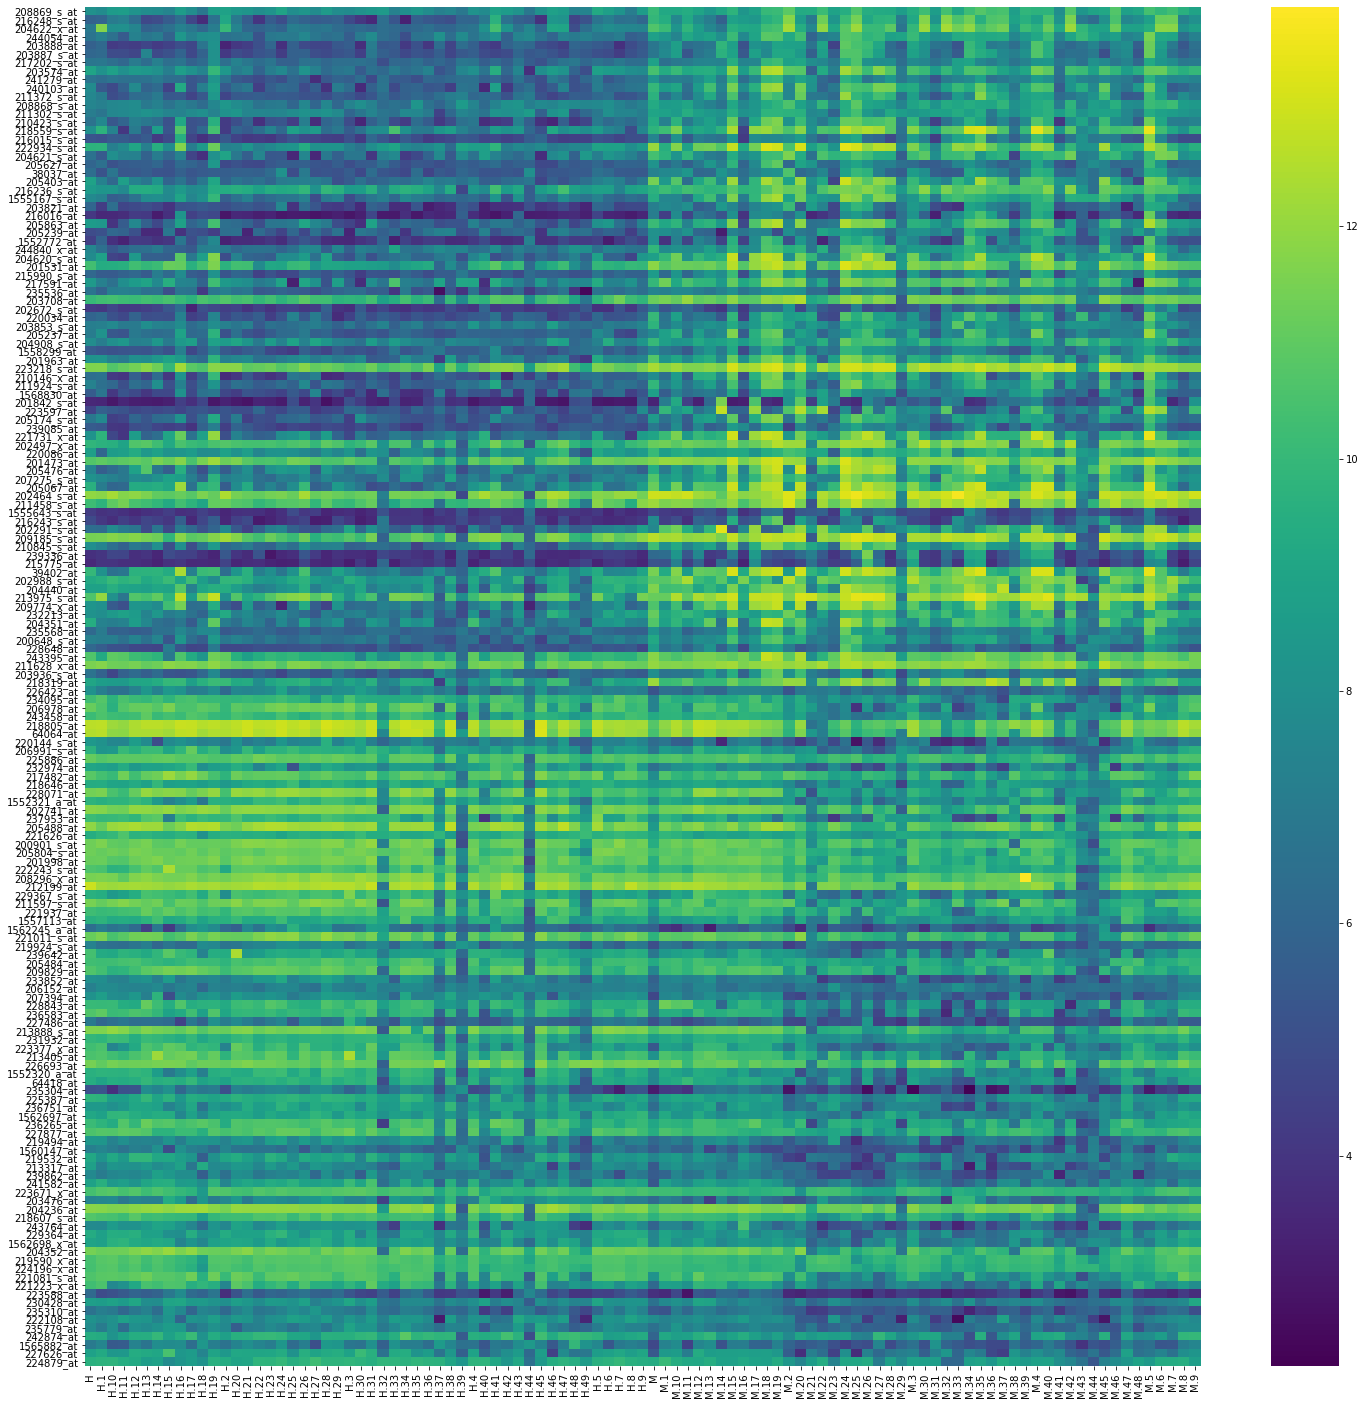

In [171]:

data_d=D.iloc[0:,1:].to_numpy(dtype=np.float)
classes=D['Class'].to_numpy(dtype=np.str)
patients=D.columns[1:].to_numpy(dtype=np.str)


fig = plt.figure(figsize=(25, 25))
ax_1 = sns.heatmap(
    data_d,
    cmap="viridis",
    xticklabels=patients, 
    yticklabels=classes
)

plt.show()
